In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
import torch
import numpy

In [51]:
# Алгоритмы оптимизации
import torch.autograd
import torch.optim

In [52]:
def show_contours(objective, 
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = numpy.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(numpy.array([[x_val, y_val]]).T))
    res = numpy.array(res)
    contour(X, Y, res, 100)

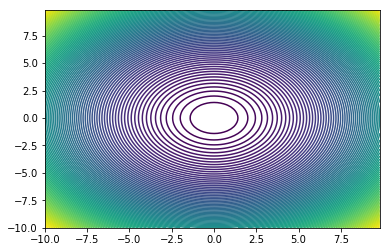

In [53]:
# Функция, которую нужно оптимизировать
def objective(inp):
    return (inp * inp).sum()

show_contours(objective)

In [65]:
# Начальное состояние
x_start = torch.Tensor([[10.0, 10.0]]).transpose(1, 0)
x_var = torch.autograd.Variable(x_start, requires_grad=True)

# Оптимизатор
optimizer = torch.optim.SGD([x_var], lr=0.01) 
print(x_var, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x_var)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x_var.data.clone().numpy()) 
    
# print(history)
print(x_var.data.numpy(), '<- result')

Variable containing:
 10
 10
[torch.FloatTensor of size 2x1]
 <- start point
[[  5.80629027e-20]
 [ -1.23217858e-20]] <- result


(2, 400)


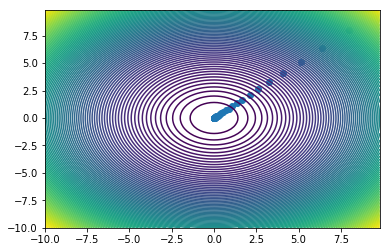

In [55]:
history_arr = numpy.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
scatter(history_arr[0, :], history_arr[1, :])

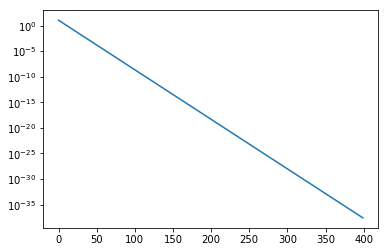

In [56]:
target = numpy.array([[0, 0]]).T
error_hist = numpy.sqrt(((history_arr - target)**2).sum(axis=0))
semilogy(error_hist)

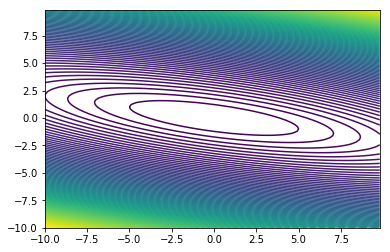

In [57]:
# Функция, которую нужно оптимизировать
def objective(inp):
#     print(inp.transpose(0, 1).shape)
    gramma = numpy.array([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0).dot(gramma.dot(inp))).sum()
    return res

show_contours(objective)

In [58]:
# Функция, которую нужно оптимизировать
def objective(inp):
    gramma = torch.autograd.Variable(torch.Tensor([[1.0, 2.0], [2.0, 10.0]]))
    res = (inp.transpose(1, 0).mm(gramma.mm(inp))).sum()
    return res

# Задача 1
Решить задачу оптимизации objective, указанного выше несколькими различными способами: 

1) SGD 

2) SGD с моментом

3) Adam

4) RProp

Какой метод обеспечивает быстрейшее схождение к решению? Обсудить результат (делать графики сходимости).

# Задача 2
Решить задачу оптимизации невыпуклой функции $f(x) = 10\sin x \sin y  + x^2 + y^2$, стартуя из точки $x_0 = 10.0, y_0 = 10.0$ всеми подходами, указанными выше.
Какой из методов решает задачу лучше всего и быстрее? Зависит ли решение от начального приближения? Обсудить, почему.